In [80]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from tensorflow import keras as krs

In [81]:
#reads datasets
(x_train,y_train),(x_test,y_test)=krs.datasets.mnist.load_data()

In [82]:
# shapes of train datasets
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [83]:
# shapes of test datasets
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [84]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [85]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

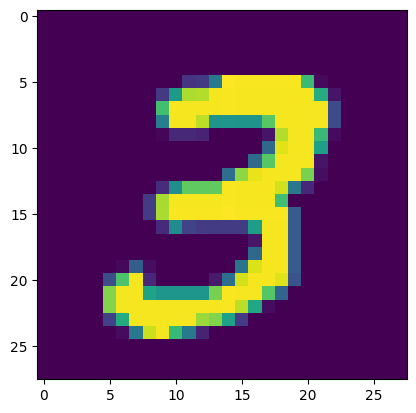

In [86]:
plt.imshow(x_train[7])

In [87]:
y_train[7]

3

In [88]:
# scaling
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [89]:
x_test_scaled[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [90]:
x_train_scaled

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [91]:
x_train_flattened=x_train_scaled.reshape(len(x_train_scaled),28*28)
x_test_flattened=x_test_scaled.reshape(len(x_test_scaled),28*28)

In [73]:
x_train_flattened.shape

(60000, 784)

***<center>model training</center>***

In [74]:
model=krs.models.Sequential()

In [75]:
model.add(krs.layers.Dense(12,input_shape=(28*28,),activation='relu'))
model.add(krs.layers.Dense(11,activation='sigmoid'))
model.add(krs.layers.Dense(10,activation='sigmoid'))

In [76]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [77]:
history=model.fit(x_train_flattened,y_train,validation_data=(x_test_flattened,y_test),epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6313 - loss: 1.3577 - val_accuracy: 0.8821 - val_loss: 0.5026
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8890 - loss: 0.4522 - val_accuracy: 0.9060 - val_loss: 0.3581
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9091 - loss: 0.3430 - val_accuracy: 0.9117 - val_loss: 0.3119
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9214 - loss: 0.2882 - val_accuracy: 0.9236 - val_loss: 0.2784
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9276 - loss: 0.2632 - val_accuracy: 0.9255 - val_loss: 0.2601
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9322 - loss: 0.2427 - val_accuracy: 0.9296 - val_loss: 0.2485
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9351 - loss: 0.2274 - val_accuracy: 0.9339 - val_loss: 0.2371
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9383 - loss: 0.2178 - 

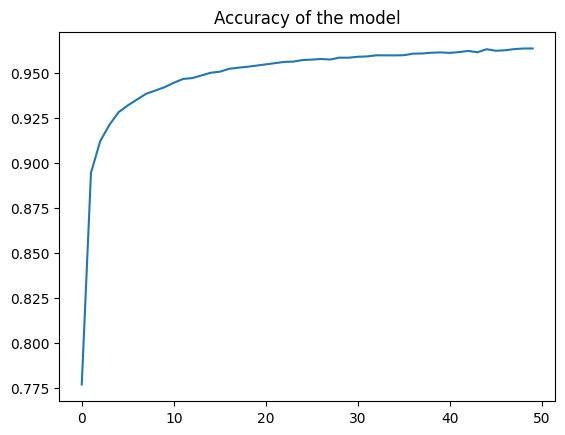

In [106]:
plt.plot(history.history['accuracy'])
plt.title("Accuracy of the model")
plt.show()

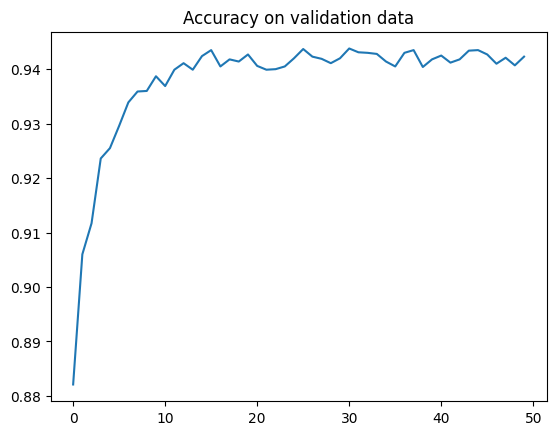

In [107]:
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy on validation data")
plt.show()

***<center>Evaluation</center>***

In [78]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9343 - loss: 0.2430


[0.21655456721782684, 0.942300021648407]

***<center>prediction</center>***

In [79]:
y_predicted=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


In [41]:
y_predicted[263]

array([4.3693236e-03, 6.0130168e-02, 3.8079426e-01, 9.6016742e-02,
       5.6636124e-04, 1.0560769e-02, 8.1361377e-06, 9.9956220e-01,
       4.0495364e-05, 4.6908489e-01], dtype=float32)

In [42]:
np.argmax(y_predicted[263])

7

In [43]:
y_test[263]

7

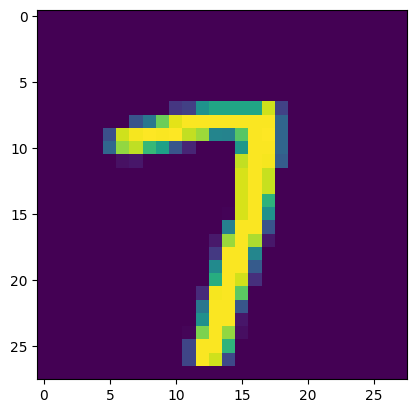

In [47]:
plt.imshow(x_test[263])
plt.show()